# Off-Facebook Analysis Report
## EMAT 22110 - Data in Emerging Media and Technology
### Author: Michael Schoeppner
### Date: 11/23/22
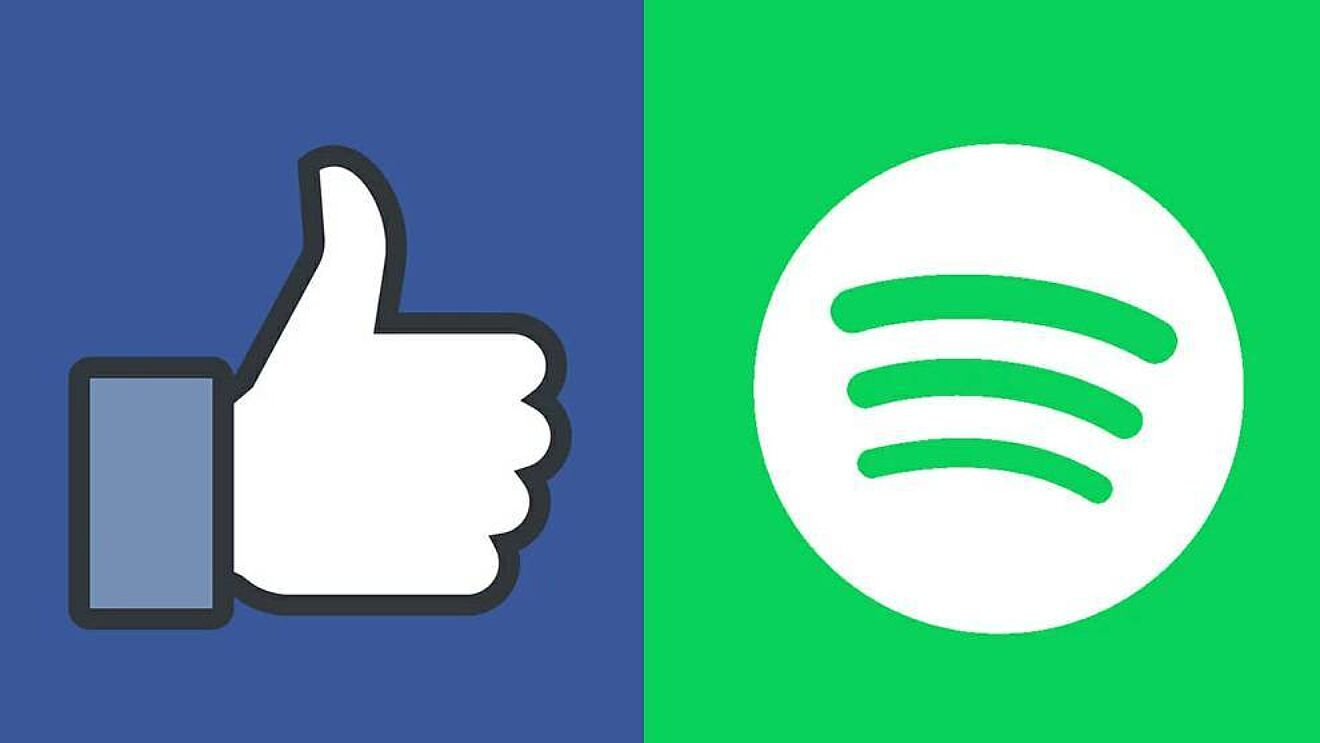

In this off-Facebook analysis report, I hope to obtain a substantial amount of information based on my Facebook data dealing with the wide range of apps and websites tracked by Facebook. In addition, I've chosen two albums that are among my all-time favorites, ranging from when I was a kid to today, which is quite different. Both are different styles of pop music but fall under the genre that I like to listen to. I will then pull data from Spotify to gather data to break down the two different albums and show the similarities and differences that they may have. After I compare them, I'll have a good idea of which is more positive in the specific section of audio features that I chose. The ones I will end up choosing will be the danceability features of the two albums and the energy features. The reason that I chose these features is because they represent a range of differences that were easy to see as well as similarities when it came to a number of songs. One alphabet was always higher than another in one feature. By the end of this analysis report, I hope to gain a greater understanding of the advertisements and apps that are more attuned to my interests, as well as how people view the albums that I am interested in and if my views are similar or different. The things that were completely different from my analysis towards the end were that there was a drastic difference in the websites and apps between the first two and those that remained after them. I was completely surprised; it was such a huge difference, as well as the album covers that I picked. I was pleasantly surprised to discover that the Melanie Martinez album was noticeably more positive than the Mama Mia album, at least in my opinion. The movie that Mama Mia came from was such a happy one, but looking back, I guess it did have a couple sad songs associated with it.

I'll make an educated guess based on my initial thoughts that the number of apps and websites on my Facebook is roughly between 30 and 40 different types, but I have a feeling it may be more, and that the number of times I interact with them may be equal between a handful of them. Due to the fact that I use a good number of websites, I would guess that they are balanced.

In [219]:
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
from scipy import stats
import base64
import requests
from datetime import datetime
import time

Part 1

In [220]:
with open(r"C:\Users\shep4\EMAT-FALL22\FB\apps_and_websites_off_of_facebook\your_off-facebook_activity.json") as j:
    fb_act = json.load(j)
fb_act.keys()

dict_keys(['off_facebook_activity_v2'])

In [ ]:
fb_act

In [222]:
type(fb_act['off_facebook_activity_v2'])

list

In [223]:
fb_act['off_facebook_activity_v2'][0]

{'name': 'Spotify - Music and Podcasts',
 'events': [{'id': 174829003346,
   'type': 'ACTIVATE_APP',
   'timestamp': 1657571220},
  {'id': 174829003346, 'type': 'ACTIVATE_APP', 'timestamp': 1655615820},
  {'id': 174829003346, 'type': 'ACTIVATE_APP', 'timestamp': 1655476560},
  {'id': 174829003346, 'type': 'ACTIVATE_APP', 'timestamp': 1655318100},
  {'id': 174829003346, 'type': 'ACTIVATE_APP', 'timestamp': 1655217420},
  {'id': 174829003346, 'type': 'ACTIVATE_APP', 'timestamp': 1649268000},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1649082900},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1648651440},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1648592640},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1648557840},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1648331460},
  {'id': 174829003346, 'type': 'ACTIVATE_APP', 'timestamp': 1648303800},
  {'id': 174829003346, 'type': 'CUSTOM', 'timestamp': 1648262700},
  {'id': 174829003346, 'type':

In [224]:
fb_act['off_facebook_activity_v2'][0].keys()

dict_keys(['name', 'events'])

I believe the events key is the number of interactions that Facebook has logged from the types of advertisements or interactions I might have had with those sites or apps. This data can be used to tell which is most popular or which I am more drawn to when it comes to the types of advertisements or apps that I may use.

In [225]:
fb_dat = pd.DataFrame(fb_act['off_facebook_activity_v2'])

In [226]:
fb_dat

,name,events
0,Spotify - Music and Podcasts,"[{'id': 174829003346, 'type': 'ACTIVATE_APP', ..."
1,Afterpay USA Business Manager,"[{'id': 192799725116511, 'type': 'PURCHASE', '..."
2,Walmart - Shopping & Grocery,"[{'id': 1410325405852019, 'type': 'ACTIVATE_AP..."
3,Stitch Fix,"[{'id': 743212369384428, 'type': 'VIEW_CONTENT..."
4,stitchfix.com,"[{'id': 812246562609385, 'type': 'COMPLETE_REG..."
...,...,...
403,overdrive.com,"[{'id': 133261010373565, 'type': 'PAGE_VIEW', ..."
404,magiquiz.com,"[{'id': 133649577145431, 'type': 'CUSTOM', 'ti..."
405,dummies.com,"[{'id': 256338321977984, 'type': 'PAGE_VIEW', ..."
406,tapas.io,"[{'id': 531074420576750, 'type': 'VIEW_CONTENT..."


In [227]:
fb_dat.count()

name      408
events    408
dtype: int64

In [228]:
fb_dat.sort_index()

,name,events
0,Spotify - Music and Podcasts,"[{'id': 174829003346, 'type': 'ACTIVATE_APP', ..."
1,Afterpay USA Business Manager,"[{'id': 192799725116511, 'type': 'PURCHASE', '..."
2,Walmart - Shopping & Grocery,"[{'id': 1410325405852019, 'type': 'ACTIVATE_AP..."
3,Stitch Fix,"[{'id': 743212369384428, 'type': 'VIEW_CONTENT..."
4,stitchfix.com,"[{'id': 812246562609385, 'type': 'COMPLETE_REG..."
...,...,...
403,overdrive.com,"[{'id': 133261010373565, 'type': 'PAGE_VIEW', ..."
404,magiquiz.com,"[{'id': 133649577145431, 'type': 'CUSTOM', 'ti..."
405,dummies.com,"[{'id': 256338321977984, 'type': 'PAGE_VIEW', ..."
406,tapas.io,"[{'id': 531074420576750, 'type': 'VIEW_CONTENT..."


In [229]:
fb_dat['events'][1]

[{'id': 192799725116511, 'type': 'PURCHASE', 'timestamp': 1656516420},
 {'id': 192799725116511, 'type': 'PURCHASE', 'timestamp': 1633650240}]

In [230]:
events = [len(x) for x in fb_dat['events']]

In [231]:
fb_dat['events'] = events

In [232]:
counts = fb_dat.count()

In [233]:
fb_sort = fb_dat.sort_values('events', ascending = False).head(30)

In [234]:
fb_sort

,name,events
110,bet.com,345
12,hbomax.com,246
5,Spotify New Music and Podcasts,239
52,disneyplus.com,101
91,shein.com,68
21,quizlet.com,58
127,Spotify: Discover new music,52
17,vh1.com,47
6,SHEIN - Online Fashion,44
120,adultswim.com,42


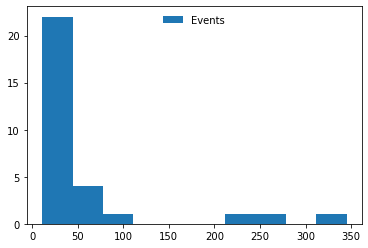

In [285]:
fig, ax0 = plt.subplots()
#event_hist = fb_sort['events'].plot.hist(bins = 20)
ax0.hist(fb_sort['events'], label = ["Events"])
ax0.legend(frameon = False, loc = 'upper center')
plt.show()

According to my observations, there is a significant difference between the first two websites and the others. There was a huge drop in event interactions after the first two events. Despite having a large number of lower-level events, I was surprised it was not more balanced in my first analysis.

In [236]:
fb_act['off_facebook_activity_v2'][0]['events'][0]['type']

'ACTIVATE_APP'

In [237]:
fb_act['off_facebook_activity_v2'][0]['events'][0]['type'] == 'ACTIVATE_APP'

True

In [238]:
apps_requests = [x['name'] for x in fb_act['off_facebook_activity_v2']]
all_event_count = [len(x['events']) for x in fb_act['off_facebook_activity_v2']]
activation_count = [len([x for x in j['events'] if x['type'] == 'ACTIVATE_APP']) for j in fb_act['off_facebook_activity_v2']]
custom_count = [len([x for x in j['events'] if x['type'] == 'CUSTOM']) for j in fb_act['off_facebook_activity_v2']]
search_count = [len([x for x in j['events'] if x['type'] == 'SEARCH']) for j in fb_act['off_facebook_activity_v2']]
view_content_count = [len([x for x in j['events'] if x['type'] == 'VIEW_CONTENT']) for j in fb_act['off_facebook_activity_v2']]
ad_request_count = [len([x for x in j['events'] if x['type'] == 'AD_REQUEST']) for j in fb_act['off_facebook_activity_v2']]
page_view_count = [len([x for x in j['events'] if x['type'] == 'PAGE_VIEW']) for j in fb_act['off_facebook_activity_v2']]

In [239]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in fb_act['off_facebook_activity_v2']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

In [240]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,Spotify - Music and Podcasts,32,25,7,0,0,0,0
1,Afterpay USA Business Manager,2,0,0,0,0,0,0
2,Walmart - Shopping & Grocery,16,8,8,0,0,0,0
3,Stitch Fix,1,0,0,0,1,0,0
4,stitchfix.com,8,0,4,0,0,0,1


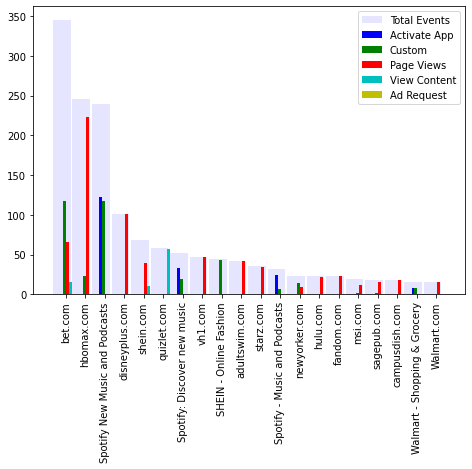

In [241]:
appbyevent = appbyevent.sort_values(by = ['Event Count'], ascending = False)
X = np.arange(20)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, appbyevent['Event Count'][0:20], color = 'b', alpha = .1, width = .90)
ax.bar(X + 0.00, appbyevent['Activate App'][0:20], color='b', width = .15)
ax.bar(X + 0.15, appbyevent['Custom'][0:20], color='g', width = .15)
ax.bar(X + 0.30, appbyevent['Page Views'][0:20], color='r', width = .15)
ax.bar(X + 0.45, appbyevent['View Content'][0:20], color='c', width = .15)
ax.bar(X+.60, appbyevent['Ad Request'][0:20], color = 'y', width = .15)
plt.xticks(ticks=X+.2, labels = list(appbyevent['App'][0:20]), rotation=90)
ax.legend(labels=['Total Events' ,'Activate App', 'Custom', 'Page Views', 'View Content', 'Ad Request'])
plt.show()

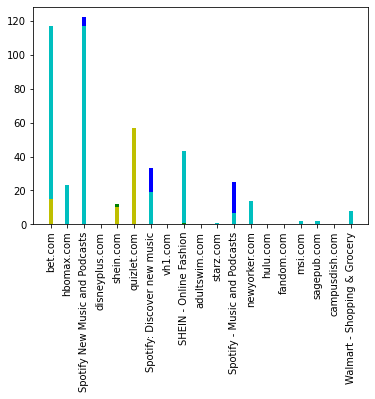

In [242]:
X = np.arange(20)
plt.bar(appbyevent['App'][0:19], appbyevent['Activate App'][0:19], color='b', width = .25)
plt.bar(appbyevent['App'][0:19], appbyevent['Custom'][0:19], color='c', width = .25)
plt.bar(appbyevent['App'][0:19], appbyevent['Search'][0:19], color='g', width = .25)
plt.bar(appbyevent['App'][0:19], appbyevent['View Content'][0:19], color='y', width = .25)
plt.xticks(rotation=90)
plt.show()

Part 2

Choose two of your favorite albums that are available on Spotify. In a Markdown cell describe 
why you choose these albums and what they mean to you. 

In [243]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 2A5E-5FC9

 Directory of C:\Users\shep4\EMAT-FALL22

11/23/2022  01:17 PM    <DIR>          .
11/01/2022  10:28 AM    <DIR>          ..
11/22/2022  02:19 PM    <DIR>          .ipynb_checkpoints
10/20/2022  11:07 AM            48,817 10-18_in-class_spotify.ipynb
10/23/2022  11:38 AM            39,806 10-18_in-class-Copy1.ipynb
10/27/2022  11:11 AM            37,345 10-27_in-class.ipynb
10/06/2022  10:19 AM             8,378 10-4_in-class.ipynb
10/06/2022  11:14 AM            27,295 10-6_in-class.ipynb
11/01/2022  11:06 AM            51,208 11-1_in-class.ipynb
11/10/2022  12:14 PM            13,121 11-10_in-class.ipynb
11/17/2022  12:05 PM            40,714 11-17_in-class.ipynb
11/22/2022  05:10 PM               589 11-3_in-class.ipynb
09/01/2022  10:24 AM               732 9-1_in-class.ipynb
11/23/2022  12:53 PM             8,773 audio_features.csv
11/01/2022  10:09 AM            77,889 cces_example_data.csv
10/04/2022  09:42 AM    

In [244]:
keys = pd.read_csv("Spotify-Keys_10-18-22.txt", header = 0, sep = ",")

In [245]:
appid = keys['Client_ID'][0]

In [246]:
appsecret = keys['Client_Secret'][0]

In [247]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [248]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [249]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [250]:
response = requests.post(access_token_url, headers = header, data = payload)

In [251]:
session_token = response.json()['access_token']

In [252]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

In [253]:
K_12_id = '1KerGJUScYGffP3Mjmjz8c'

In [254]:
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(K_12_id)

In [255]:
K_12_tracks = requests.get(album_tracks_endpoint, headers = session_header)

In [256]:
K_12_tracks.status_code

200

In [257]:
K_12_dict = json.loads(K_12_tracks.text)

In [258]:
K_12_dict.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [259]:
K_12_dict['items'][0].keys()

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

In [260]:
K_12_track_ids = [x['id'] for x in K_12_dict['items']]

In [261]:
K_12_track_ids

['2plUcsOZm6pi1kFUncqLni',
 '37pf8jSeCGlzgQPIfVHO6X',
 '7fYNunIzTO7yAHBQtvq8Fc',
 '7po7c8LzxTZ0ybU41qT5gD',
 '4fRzunTZ51UC0oNwoVqiKB',
 '6FcNLunvzsHCVVf4TGYULM',
 '57OBlxZRcRyHFdlXlsHP7G',
 '6viCrMdt8zgjOygIuJMC5X',
 '1NekIhcxQF8H8JXOarAUTt',
 '7i9AEaOWJrfVBsinUSefma',
 '5o5akY9xnEk6lpMkD8RwD9',
 '7FwWRSAlhfyhbvybdfDUCe',
 '1QtpKRXtJZSdJp3Y299zkQ']

In [262]:
K_12_track_strings = ','.join(str(x) for x in K_12_track_ids)
K_12_track_strings

'2plUcsOZm6pi1kFUncqLni,37pf8jSeCGlzgQPIfVHO6X,7fYNunIzTO7yAHBQtvq8Fc,7po7c8LzxTZ0ybU41qT5gD,4fRzunTZ51UC0oNwoVqiKB,6FcNLunvzsHCVVf4TGYULM,57OBlxZRcRyHFdlXlsHP7G,6viCrMdt8zgjOygIuJMC5X,1NekIhcxQF8H8JXOarAUTt,7i9AEaOWJrfVBsinUSefma,5o5akY9xnEk6lpMkD8RwD9,7FwWRSAlhfyhbvybdfDUCe,1QtpKRXtJZSdJp3Y299zkQ'

In [263]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(K_12_track_strings)

In [264]:
K_12_features = requests.get(track_features_endpoint, headers = session_header)

In [265]:
K_12_features.status_code

200

In [266]:
K_12_dict = json.loads(K_12_features.text)

In [267]:
K_12_dict.keys()

dict_keys(['audio_features'])

In [268]:
K_12_dict['audio_features'][0]

{'danceability': 0.708,
 'energy': 0.618,
 'key': 7,
 'loudness': -6.315,
 'mode': 1,
 'speechiness': 0.039,
 'acousticness': 0.592,
 'instrumentalness': 2.21e-06,
 'liveness': 0.399,
 'valence': 0.563,
 'tempo': 95.947,
 'type': 'audio_features',
 'id': '2plUcsOZm6pi1kFUncqLni',
 'uri': 'spotify:track:2plUcsOZm6pi1kFUncqLni',
 'track_href': 'https://api.spotify.com/v1/tracks/2plUcsOZm6pi1kFUncqLni',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2plUcsOZm6pi1kFUncqLni',
 'duration_ms': 220897,
 'time_signature': 4}

In [269]:
K_12_df = pd.DataFrame(K_12_dict['audio_features'])

In [270]:
K_12_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.708,0.618,7,-6.315,1,0.0390,0.592,0.000002,0.399,0.563,95.947,audio_features,2plUcsOZm6pi1kFUncqLni,spotify:track:2plUcsOZm6pi1kFUncqLni,https://api.spotify.com/v1/tracks/2plUcsOZm6pi...,https://api.spotify.com/v1/audio-analysis/2plU...,220897,4
1,0.767,0.707,6,-8.444,1,0.0489,0.420,0.000052,0.298,0.772,92.015,audio_features,37pf8jSeCGlzgQPIfVHO6X,spotify:track:37pf8jSeCGlzgQPIfVHO6X,https://api.spotify.com/v1/tracks/37pf8jSeCGlz...,https://api.spotify.com/v1/audio-analysis/37pf...,161065,4
2,0.664,0.724,10,-5.005,1,0.0400,0.441,0.000000,0.174,0.641,98.020,audio_features,7fYNunIzTO7yAHBQtvq8Fc,spotify:track:7fYNunIzTO7yAHBQtvq8Fc,https://api.spotify.com/v1/tracks/7fYNunIzTO7y...,https://api.spotify.com/v1/audio-analysis/7fYN...,176844,4
3,0.535,0.746,4,-5.644,0,0.2750,0.304,0.000000,0.359,0.648,109.994,audio_features,7po7c8LzxTZ0ybU41qT5gD,spotify:track:7po7c8LzxTZ0ybU41qT5gD,https://api.spotify.com/v1/tracks/7po7c8LzxTZ0...,https://api.spotify.com/v1/audio-analysis/7po7...,215973,4
4,0.612,0.651,2,-8.292,0,0.1900,0.313,0.000000,0.114,0.556,182.870,audio_features,4fRzunTZ51UC0oNwoVqiKB,spotify:track:4fRzunTZ51UC0oNwoVqiKB,https://api.spotify.com/v1/tracks/4fRzunTZ51UC...,https://api.spotify.com/v1/audio-analysis/4fRz...,202723,3


In [271]:
Mama_Mia_id = '14hC5eBiPUxdPa90eCzwrR'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(Mama_Mia_id)
Mama_Mia_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(Mama_Mia_tracks.status_code)
Mama_Mia_dict = json.loads(Mama_Mia_tracks.text)
Mama_Mia_track_ids = [x['id'] for x in Mama_Mia_dict['items']]
Mama_Mia_track_strings = ','.join(str(x) for x in Mama_Mia_track_ids)
print(Mama_Mia_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(Mama_Mia_track_strings)

200
1WOBzx0R3hyphrI1AUv4Zu,2wcs7pwj5bzhVodPO21O7S,71CU7N8x2l4b5DEHPXxZfE,0KGOBUQSvFzufIGbQabIxr,6rekLbbb3i42gCgFIXOFvE,19GsJOvgLVujgxcnDVd8FB,6XmiE7UK0cimqiI8LKbpMb,4pKTaU9Vm7nC5tC0mxjxfI,021oUsG0NYI7YuJK6c0ecG,7jicciytVTNBXYrIXHs3Hv,6ERUsU7mPnu6sUQptDACkA,717z018DWodjJnW6DE7t4z,3zZ6W6T7TuGJmcyvZ5VRlo,7C3xydn7tJZLCSBcV2ZFYe,1V9zWcD0PpWlFa42vCErzm,248wt1trbhwrNN5fBC3Q3W,1QWJmDzpPKqewtg0abEyq8,1r93lJK0yzvdlmqMIbqiqR


In [272]:
Mama_Mia_features = requests.get(track_features_endpoint, headers = session_header)
Mama_Mia_features.status_code

200

In [273]:
Mama_Mia_dict = json.loads(Mama_Mia_features.text)
Mama_Mia_dict['audio_features'][0]

{'danceability': 0.536,
 'energy': 0.846,
 'key': 3,
 'loudness': -4.661,
 'mode': 1,
 'speechiness': 0.0558,
 'acousticness': 0.332,
 'instrumentalness': 0,
 'liveness': 0.047,
 'valence': 0.79,
 'tempo': 154.744,
 'type': 'audio_features',
 'id': '1WOBzx0R3hyphrI1AUv4Zu',
 'uri': 'spotify:track:1WOBzx0R3hyphrI1AUv4Zu',
 'track_href': 'https://api.spotify.com/v1/tracks/1WOBzx0R3hyphrI1AUv4Zu',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1WOBzx0R3hyphrI1AUv4Zu',
 'duration_ms': 181533,
 'time_signature': 4}

In [274]:
Mama_Mia_df = pd.DataFrame(Mama_Mia_dict['audio_features'])

In [275]:
Mama_Mia_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.536,0.846,3,-4.661,1,0.0558,0.3320,0.000000,0.047,0.790,154.744,audio_features,1WOBzx0R3hyphrI1AUv4Zu,spotify:track:1WOBzx0R3hyphrI1AUv4Zu,https://api.spotify.com/v1/tracks/1WOBzx0R3hyp...,https://api.spotify.com/v1/audio-analysis/1WOB...,181533,4
1,0.383,0.186,0,-10.759,1,0.0305,0.8990,0.000003,0.108,0.151,108.596,audio_features,2wcs7pwj5bzhVodPO21O7S,spotify:track:2wcs7pwj5bzhVodPO21O7S,https://api.spotify.com/v1/tracks/2wcs7pwj5bzh...,https://api.spotify.com/v1/audio-analysis/2wcs...,269067,4
2,0.601,0.542,7,-8.003,1,0.0348,0.4520,0.000000,0.317,0.823,82.228,audio_features,71CU7N8x2l4b5DEHPXxZfE,spotify:track:71CU7N8x2l4b5DEHPXxZfE,https://api.spotify.com/v1/tracks/71CU7N8x2l4b...,https://api.spotify.com/v1/audio-analysis/71CU...,225000,4
3,0.645,0.855,2,-5.630,1,0.0356,0.0906,0.000000,0.114,0.649,147.007,audio_features,0KGOBUQSvFzufIGbQabIxr,spotify:track:0KGOBUQSvFzufIGbQabIxr,https://api.spotify.com/v1/tracks/0KGOBUQSvFzu...,https://api.spotify.com/v1/audio-analysis/0KGO...,168800,4
4,0.550,0.780,2,-5.550,1,0.0356,0.1290,0.000002,0.132,0.794,117.654,audio_features,6rekLbbb3i42gCgFIXOFvE,spotify:track:6rekLbbb3i42gCgFIXOFvE,https://api.spotify.com/v1/tracks/6rekLbbb3i42...,https://api.spotify.com/v1/audio-analysis/6rek...,198360,4


The two audio features I have chosen that best capture the qualities of these albums are danceability and energy. The reason I chose these features is that, from looking at the data I collected from the dataframe, there would be a good amount of differences between the two to see, and that I tried loudness, and it ended up being that Mama Mias' album was loud most of the time, though it had a great increase of almost more than half the songs in the album, whereas K-12 was constantly loud.

In [276]:
K_12_df['album'] = ['K_12'] * len(K_12_df.index)

In [277]:
Mama_Mia_df['album'] = ['Mama_Mia'] * len(Mama_Mia_df.index)

In [278]:
audio_features = pd.concat([K_12_df, Mama_Mia_df])

In [279]:
audio_features.to_csv('audio_features.csv')

In [280]:
af = pd.read_csv('audio_features.csv', sep = ',')

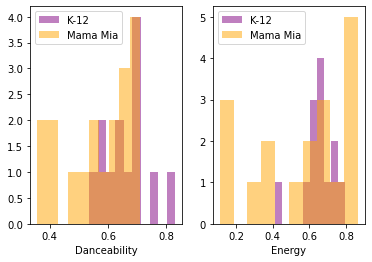

In [296]:
fig1, ax1 = plt.subplots(1, 2)
Kx = audio_features[audio_features['album'] == 'K_12']['danceability']
Ky = audio_features[audio_features['album'] == 'K_12']['energy']
Max = audio_features[audio_features['album'] == 'Mama_Mia']['danceability']
May = audio_features[audio_features['album'] == 'Mama_Mia']['energy']
ax1[0].hist(Kx, alpha = 0.5, color = 'purple', label = 'K-12')
ax1[1].hist(Ky, alpha = 0.5, color = 'purple', label = 'K-12')
ax1[0].hist(Max, alpha = 0.5, color = 'orange', label = 'Mama Mia')
ax1[1].hist(May, alpha = 0.5, color = 'orange', label = 'Mama Mia')
ax1[0].set_xlabel('Danceability')
ax1[1].set_xlabel('Energy')
ax1[0].legend()
ax1[1].legend()
plt.show()

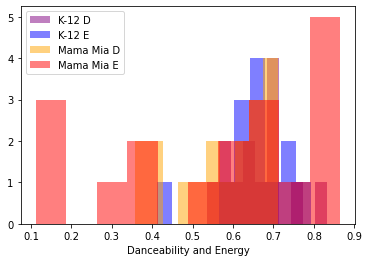

In [290]:
fig1, ax1 = plt.subplots()
Kx = audio_features[audio_features['album'] == 'K_12']['danceability']
Ky = audio_features[audio_features['album'] == 'K_12']['energy']
Max = audio_features[audio_features['album'] == 'Mama_Mia']['danceability']
May = audio_features[audio_features['album'] == 'Mama_Mia']['energy']
ax1.hist(Kx, alpha = 0.5, color = 'purple', label = 'K-12 D')
ax1.hist(Ky, alpha = 0.5, color = 'blue', label = 'K-12 E')
ax1.hist(Max, alpha = 0.5, color = 'orange', label = 'Mama Mia D')
ax1.hist(May, alpha = 0.5, color = 'red', label = 'Mama Mia E')
ax1.set_xlabel('Danceability and Energy')
ax1.legend()
plt.show()

The energy levels between the two albums are vastly different, with Mama Mia having a good amount of songs with high and low energy, whereas Melanie Martinez has an equal distribution of mixed energy in all of her songs. The dancability between the two albums is roughly the same, though Mama Mias' album starts low and builds in the center, whereas the K-12 album builds in the center and gets lower as it becomes more danceable.

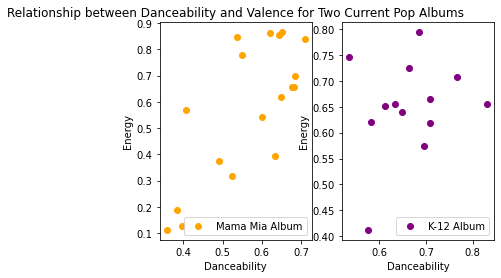

In [282]:
fig2, ax2 = plt.subplots(1, 2)
K_df = af[af['album'] == 'K_12']
Ma_df = af[af['album'] == 'Mama_Mia']
ax2[0].scatter(Ma_df['danceability'], Ma_df['energy'], label = 'Mama Mia Album', color = 'orange')
ax2[1].scatter(K_df['danceability'], K_df['energy'], label = 'K-12 Album', color = 'purple')
ax2[0].set_xlabel('Danceability')
ax2[0].set_ylabel('Energy')
ax2[1].set_xlabel('Danceability')
ax2[1].set_ylabel('Energy')
ax2[0].set_title('Relationship between Danceability and Valence for Two Current Pop Albums')
ax2[0].legend()
ax2[1].legend()
plt.show()

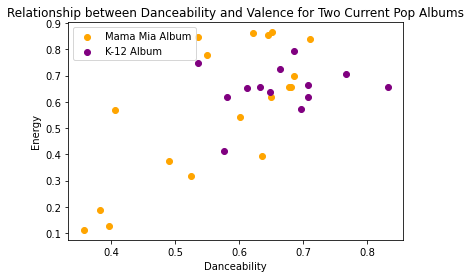

In [283]:
fig2, ax2 = plt.subplots()
K_df = af[af['album'] == 'K_12']
Ma_df = af[af['album'] == 'Mama_Mia']
ax2.scatter(Ma_df['danceability'], Ma_df['energy'], label = 'Mama Mia Album', color = 'orange')
ax2.scatter(K_df['danceability'], K_df['energy'], label = 'K-12 Album', color = 'purple')
ax2.set_xlabel('Danceability')
ax2.set_ylabel('Energy')
ax2.set_title('Relationship between Danceability and Valence for Two Current Pop Albums')
ax2.legend()
plt.show()

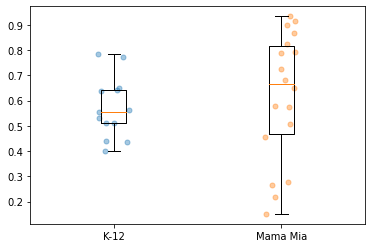

In [284]:
fig2, ax2 = plt.subplots()
K_val = af[af['album'] == 'K_12']['valence']
Ma_val = af[af['album'] == 'Mama_Mia']['valence']
K_x = [1] * len(K_val)
Ma_x = [2] * len(Ma_val)
K_x_jitter = np.random.uniform(-0.10, .10, len(K_x))
Ma_x_jitter = np.random.uniform(-0.10, .10, len(Ma_x))
ax2.scatter(K_x + K_x_jitter, K_val, alpha = 0.4, s = 25)
ax2.scatter(Ma_x + Ma_x_jitter, Ma_val, alpha = 0.4, s = 25)
ax2.set_xlim(0.5, 2.5)
# fig2.set_figheight(10)
ax2.boxplot([K_val, Ma_val])
ax2.set_xticks([1,2], ['K-12', 'Mama Mia'])
plt.show()

In [293]:
stats.ttest_ind(K_12_df['danceability'], K_12_df['energy'])

Ttest_indResult(statistic=0.41796504015716, pvalue=0.6796886899332228)

In [294]:
stats.ttest_ind(Mama_Mia_df['danceability'], Mama_Mia_df['energy'])

Ttest_indResult(statistic=-0.08216512929730303, pvalue=0.9349972168633617)

When comparing both the danceability and energy, I can tell from the ttes_ind() function that the first album dealing with Melanie Martinez K-12 has a positive response, whereas the other album I chose from Mama Mia has a negative response. 